# **K-Nearest Neighbors (KNN)**

[**Nearest Neighbors**](https://scikit-learn.org/stable/modules/neighbors.html)

[**sklearn.neighbors.KNeighborsClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)


In [1]:
# Import Library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import Dataset.
""" https://www.kaggle.com/datasets/d4rklucif3r/social-network-ads """
dataset = pd.read_csv("Social_Network_Ads.csv")
print(dataset.head())

# Split the dataset into features and target values.
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling.
sc = StandardScaler()
X = sc.fit_transform(X)

# Split the dataset into training and test set.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Training the KNN Model.
clf = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2).fit(X_train, y_train)

# Predicting Test set Results.
y_pred = clf.predict(X_test)

# Predicting New Results.
print("Prediction of New Result is ", clf.predict(sc.transform([[30, 87000]])))

# Predictions and Evaluations.
print("Confusion Matrix is \n", confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
Prediction of New Result is  [0]
Confusion Matrix is 
 [[48  4]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



# **Choosing a 'K' Value: Use the Elbow Method to pick a good 'K' Value.**

> [**Elbow Method - Wikipedia**](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

> [**Elbow Method**](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

Text(0, 0.5, 'Error Rate')

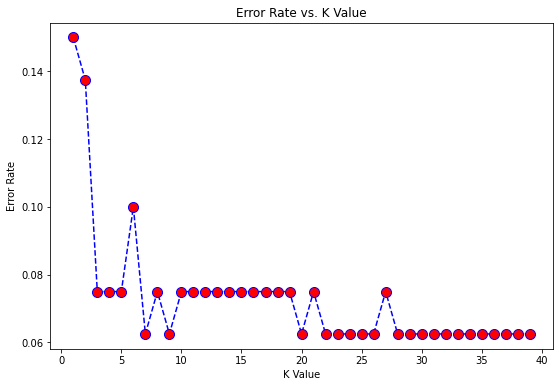

In [2]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(9, 6))
plt.plot(
    range(1, 40),
    error_rate,
    color="blue",
    linestyle="dashed",
    marker="o",
    markerfacecolor="red",
    markersize=10,
)
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")

Here we can see that when the $K$ value lies between 20 to 25, the error rate just tends to hover around 0.04-0.03 (i.e., the minimum). Let's retrain the model with that and check the classification report!